In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact, IntSlider
%matplotlib inline

pi = np.pi

plt.rcParams['font.size'] = 40
plt.rcParams['figure.figsize'] = (40, 10)
plt.rcParams['lines.linewidth'] = 2.0

# Aufgabe 6: Korrelationsfunktionen

Gegeben sei das Signal $x(t) = \mathrm{si}\left(\frac{\pi t}{T}\right)$.

### Plot des Signals $x(t)$

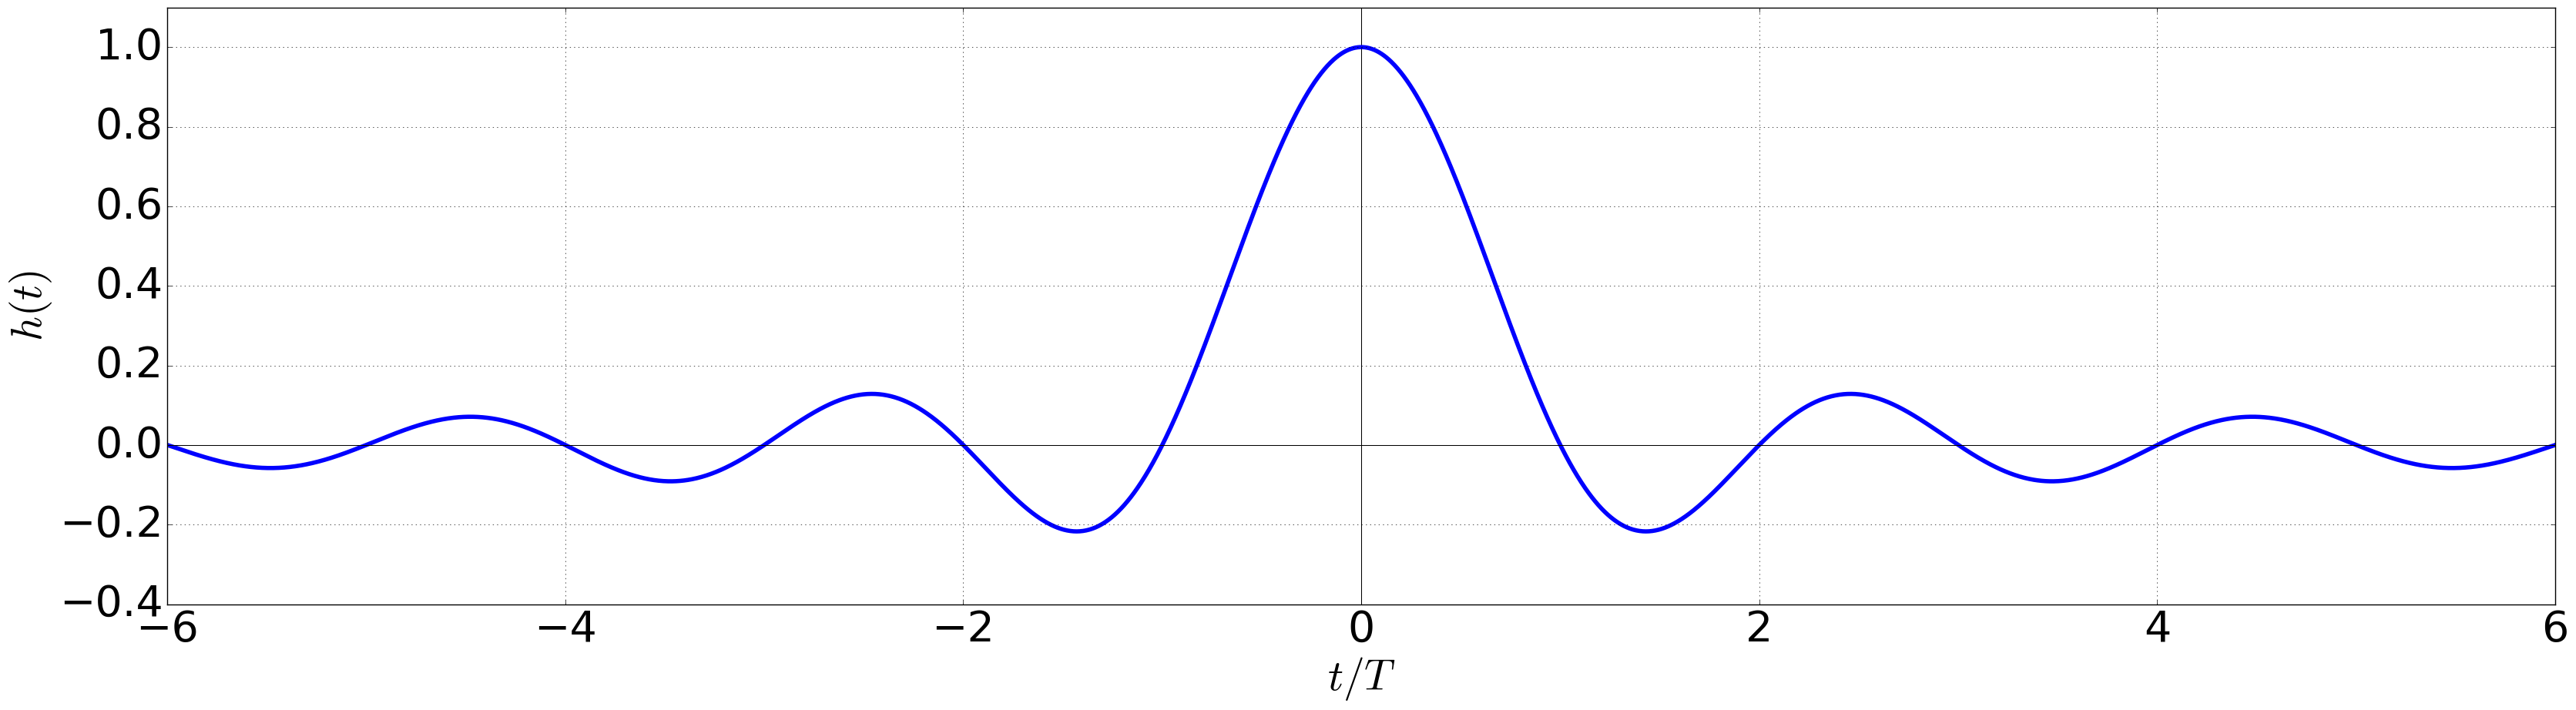

In [2]:
N = 3*1000
T = 1
T_d = 12*T
samples_per_unit = N/T_d
delta_t = 1/samples_per_unit

t = np.linspace(-T_d/2, T_d/2, N)

x = np.sinc(t/T)

plt.axvline(linewidth=0.75, color='k')
plt.plot(t/T, x, 'b-', lw=4);
plt.axhline(linewidth=0.75, color='k')
plt.xlabel(r'$t/T$')
plt.ylabel(r'$h(t)$')
plt.xlim((-6, 6))
plt.ylim((-0.4, 1.1))
plt.grid(True);

## 6.1
Ist $x(t)$ ein Energie- oder ein Leistungssignal?

Energiesignale haben eine endliche Energie:

\begin{align}
    E_x = \int_{-\infty}^{\infty} \left|x(t)\right|^2 \mathrm{d}t \overset{!}{<} \infty
\end{align}

Da das Integral über $|x(t)|^2 = \left(\mathrm{si}\left(\frac{\pi t}{T}\right)\right)^2$ umständlich zu berechnen ist, wird das Parseval-Theorem für Energiesignale ausgenutzt:

\begin{align}
    E_x = \int_{-\infty}^{\infty} \left|x(t)\right|^2 \mathrm{d}t = \frac{1}{2 \pi} \int_{-\infty}^{\infty} \left|X(j\omega)\right|^2 \mathrm{d}\omega.
\end{align}
Es ist also egal, ob die Energie im Zeit- oder Frequenzbereich bestimmt wird.

Mit dem Transformationspaar $\mathcal{F} \left\{ \mathrm{si}\left(\frac{\pi t}{T}\right) \right\}  = \mathcal{F} \left\{ \frac{2 \pi}{2 \pi} \mathrm{si}\left(\frac{2 \pi t}{2T}\right) \right\} = T \mathrm{rect} \left( \frac{\omega}{ 2 \pi / T} \right)$ ergibt sich für die Energie:  

\begin{align}
    E_x = \frac{1}{2 \pi} \int_{-\infty}^{\infty} \left|X(j\omega)\right|^2 \mathrm{d}\omega
        = \frac{1}{2 \pi} \int_{-\infty}^{\infty} \left(T \mathrm{rect} \left( \frac{\omega}{ 2 \pi / T} \right)\right)^2 \mathrm{d}\omega \\
        = \frac{T^2}{2 \pi} \int_{-\infty}^{\infty} \mathrm{rect} \left( \frac{\omega}{ 2 \pi / T} \right) \mathrm{d}\omega 
        = \frac{T^2}{2 \pi} \int_{-\pi/T}^{\pi/T} 1 \mathrm{d}\omega \\ 
        = \frac{T^2}{2 \pi} \cdot \left[\omega \right]_{-\pi/T}^{\pi/T} = T < \infty.
\end{align}

Da die Energie beschränkt ist, ist $x(t)$ ein Energiesignal. Dabei wurde ausgenutzt, dass das Quadrat eines Rechtecks immer noch ein Rechteck ist.

## 6.2
Berechnen Sie die Autokorrelationsfunktion von $x(t)$, seine Energie/Leistung und das Energie-
/Leistungsdichtespektrum.

Die Autokorrelationsfunktion kann über eine Faltung dargestellt werden:

\begin{align}
    \varphi^\text{E}_{xx}(\tau) &= \int_{-\infty}^{\infty} x^{\ast}(t)x(t+\tau) \mathrm{d}t = \left. \int_{-\infty}^{\infty} x^{\ast}(t)x(\tau-(-t)) \mathrm{d}t \quad \quad \right| t' = -t,\  \mathrm{d}t' = -\mathrm{d}t,\  t'(\infty) = -\infty,\  t'(-\infty) = \infty  \\
        &= -\int_{\infty}^{-\infty} x^{\ast}(-t')x(\tau-t') \mathrm{d}t' = x^{\ast}(-\tau) \ast x(\tau)
\end{align}

Da die Faltung im Zeitbereich schwierig zu berechnen ist, wird sie wieder im Frequenzbereich bestimmt. Es gilt das Wiener-Khinchine-Theorem:  

\begin{align}
    \Phi^\text{E}_{xx}(j\omega) = \mathcal{F}\left\{ \varphi^\text{E}_{xx}(\tau) \right\} = \mathcal{F}\left\{ x^{\ast}(-\tau) \ast x(\tau) \right\} = \mathcal{F}\left\{ x^{\ast}(-\tau) \right\} \mathcal{F}\left\{ x(\tau) \right\} = X^{\ast}(-(-j\omega)) X(j\omega) = \left| X(j\omega) \right|^2
\end{align}  

Mit dem zuvor bestimmten Transformationspaar gilt:
\begin{align}
    \Phi^\text{E}_{xx}(j\omega) = \left|T \mathrm{rect}\left(\frac{\omega}{2\pi/T}\right)\right|^2
            = T^2 \mathrm{rect}\left(\frac{\omega}{2\pi/T}\right)
\end{align}

Die Rücktransformation ergibt als Autokorrelationsfunktion das Eingangssignal skaliert mit einem Faktor $T$:

\begin{align}
    \varphi^\text{E}_{xx}(\tau) = \mathcal{F}^{-1} \left\{ T^2 \mathrm{rect}\left(\frac{\omega}{2\pi/T}\right) \right\}
    = T \mathrm{si}\left(\frac{\pi \tau}{T}\right) 
\end{align}

Die Energie kann auf sehr viele Weisen berechnet werden:

\begin{align}
    E_x = \varphi^\text{E}_{xx}(0) = \int_{-\infty}^{\infty} \left|x(t)\right|^2 \mathrm{d}t = \frac{1}{2 \pi} \int_{-\infty}^{\infty} \left|X(j\omega)\right|^2 \mathrm{d}\omega = \frac{1}{2 \pi} \int_{-\infty}^{\infty} \Phi^\text{E}_{xx}(j\omega)  \mathrm{d}\omega
\end{align}

Die Gleichung in der Mitte ist das Parsevaltheorem. Aus dem letzten Integral wird die Bezeichnung Energiedichtespektrum deutlich: $\Phi^\text{E}_{xx}(j\omega)$ kann als Energie pro (unendlich kleinem) Frequenzintervall um $\omega$ herum aufgefasst werden.
Es sollte immer die Methode gewählt werden, die am einfachsten ist. Hier ist dies die Auswertung der AKF an der Stelle $\tau =0$:

\begin{align}
    E_x = \varphi^\text{E}_{xx}(0) = T \mathrm{si}\left(\frac{\pi 0}{T}\right) = T
\end{align}

#### Graph der AKF $\varphi_{xx}^{E}(\tau)$:

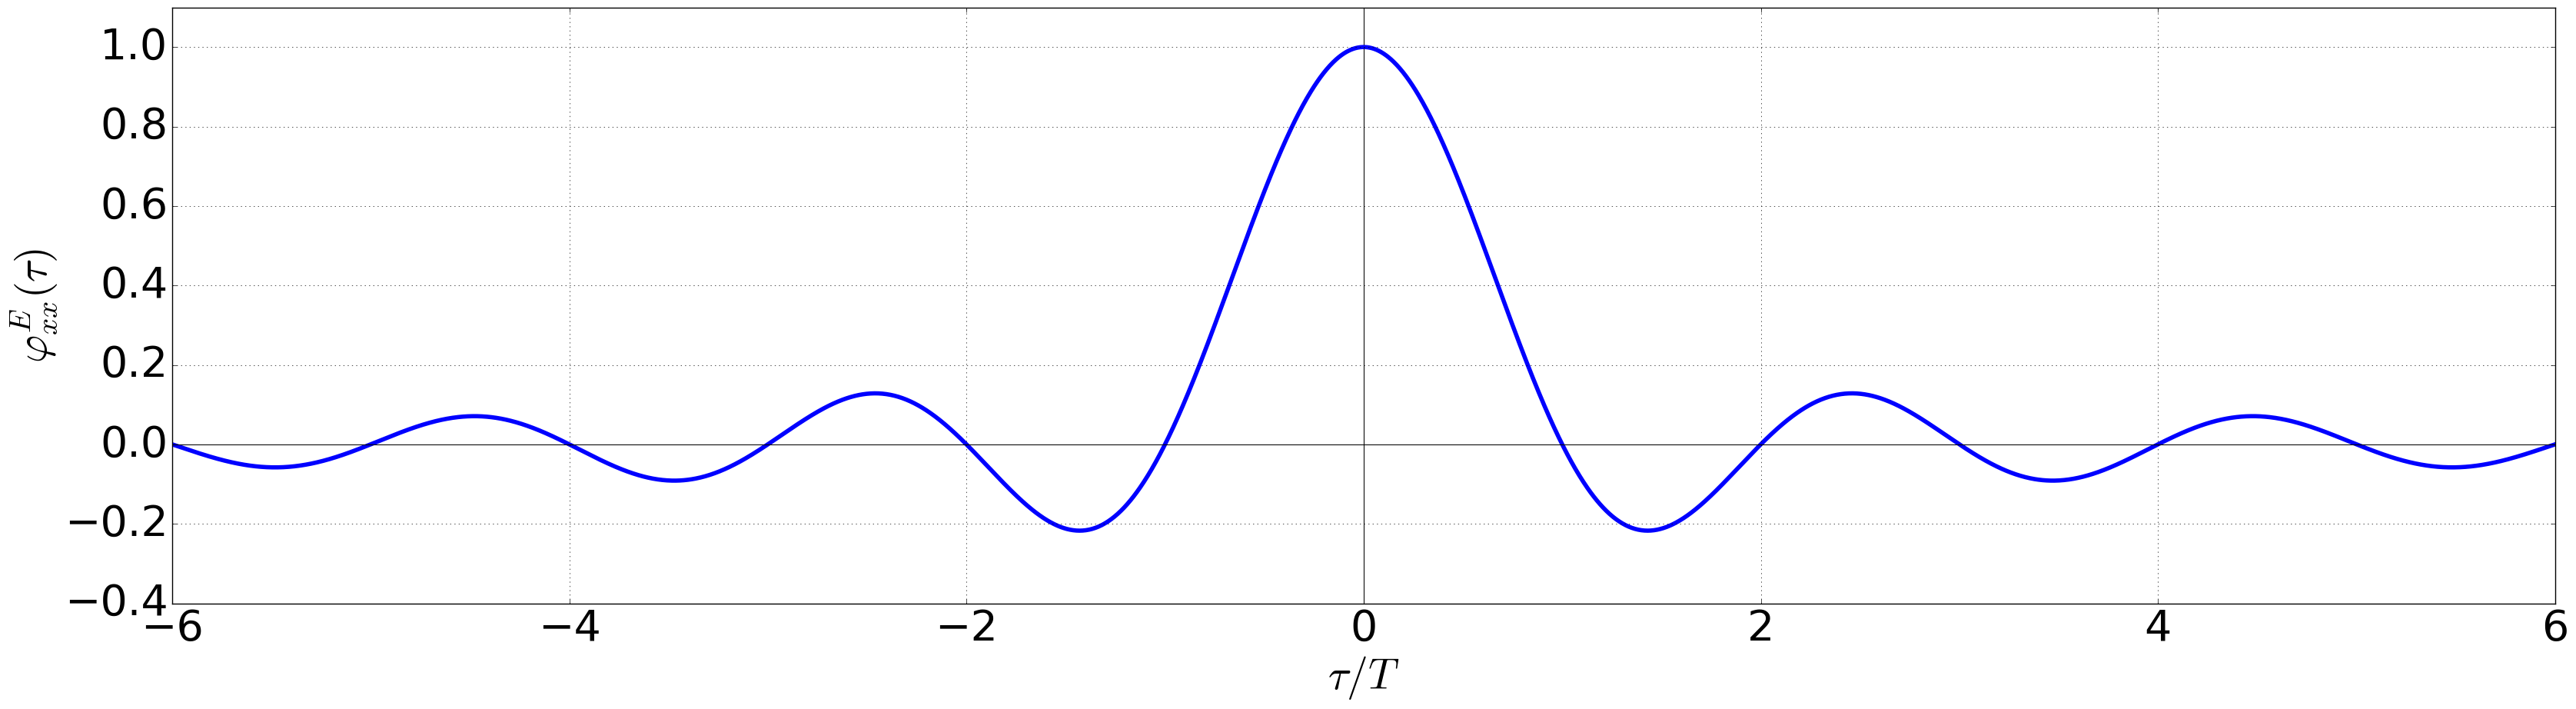

In [3]:
tau = t
phi_xx = np.sinc(tau/T)

plt.axvline(linewidth=0.75, color='k')
plt.plot(tau/T, x, 'b-', lw=4);
plt.axhline(linewidth=0.75, color='k')
plt.xlabel(r'$\tau/T$');
plt.ylabel(r'$\varphi_{xx}^{E}(\tau)$');
plt.xlim((-6, 6))
plt.ylim((-0.4, 1.1))
plt.grid(True)

#### Graph des Energiedichtespektrums $\Phi_{xx}^{E}(j\omega)$:

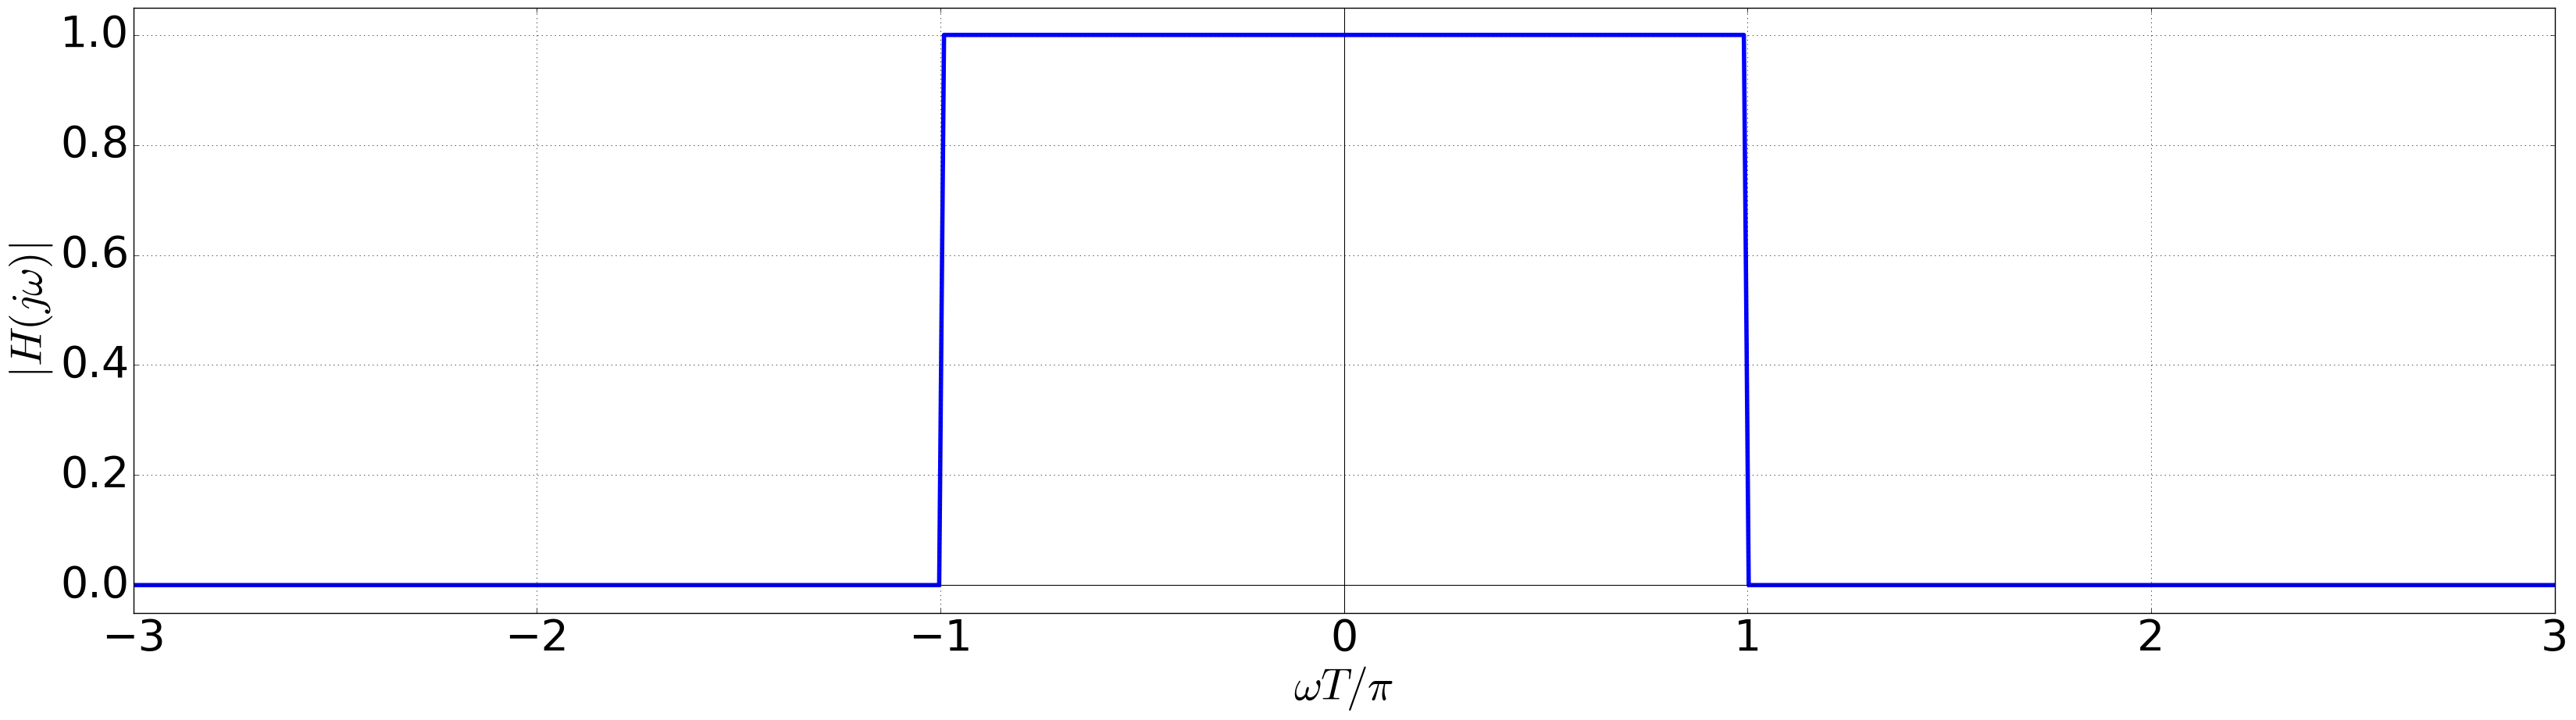

In [4]:
wT = np.linspace(-6*pi, 6*pi, 1000)

Phi_xx = (T**2)*(np.abs(wT) <= pi/T)

plt.axvline(lw=0.75, c='k')
plt.plot(wT/pi, Phi_xx, lw=4)
plt.axhline(lw=0.75, c='k')
plt.xlabel(r'$\omega T/\pi$')
plt.ylabel(r'$|H(j\omega)|$')
plt.xlim((-3, 3))
plt.ylim((-0.05, 1.05))
plt.grid(True);

Jetzt betrachten wir das Signal $y(t) = \cos(\omega_0 t)$.

#### Graph von $y(t)$:

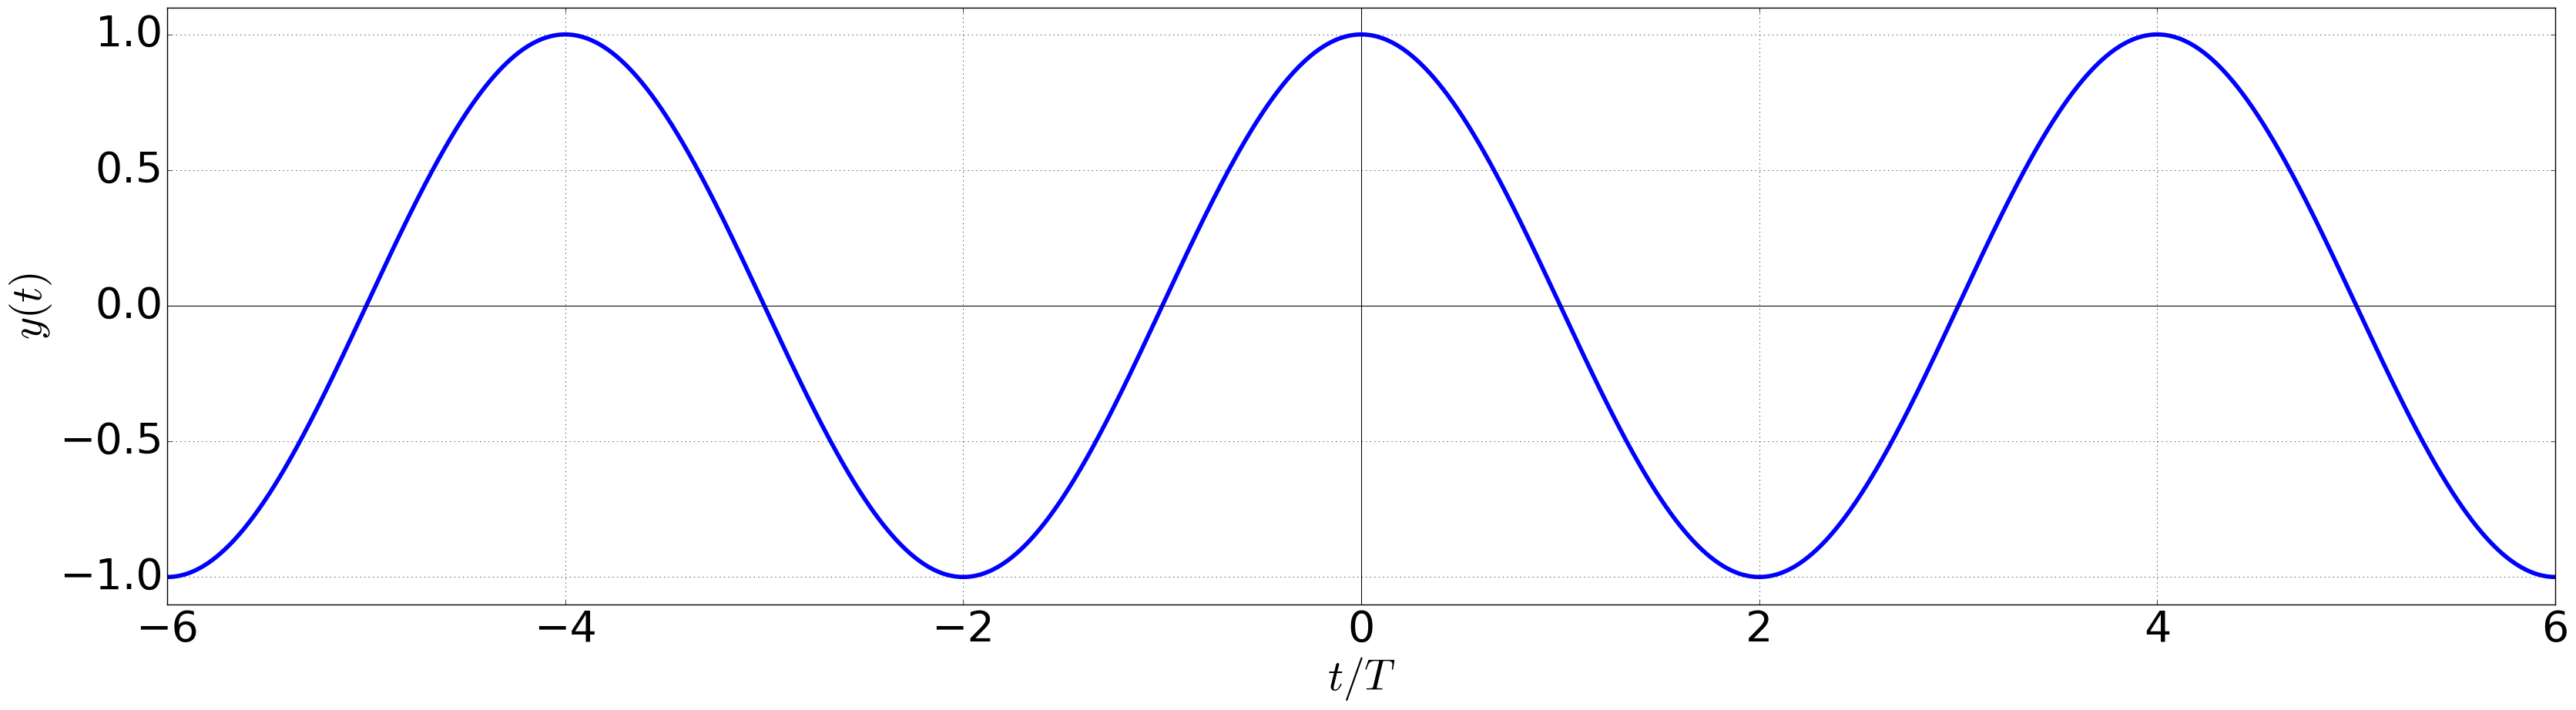

In [5]:
T_0 = 4*T
omega_0 = 2*pi/T_0
y = np.cos(omega_0*t)

plt.axvline(linewidth=0.75, color='k')
plt.plot(t/T, y, 'b-', lw=4);
plt.axhline(linewidth=0.75, color='k')
plt.xlabel(r'$t/T$')
plt.ylabel(r'$y(t)$')
plt.xlim((-6, 6))
plt.ylim((-1.1, 1.1))
plt.grid(True);

## 6.3
Ist $y(t)$ ein Energie- oder Leistungssignal?

Kurze Antwort: $y(t)$ ist periodisch mit Periodendauer $T= \frac{2 \pi}{\omega_0}$. Das Signal klingt deshalb nicht ab und die Energie ist unendlich. Es ist deshalb ein Leistungssignal.  
Dies lässt sich etwa folgendermaßen zeigen, indem das Integral in eine Summe von Integralen, die jeweils über eine Periode gehen, zerlegt wird:

\begin{align}
     E_y = \int_{-\infty}^{\infty} \left|y(t)\right|^2 \mathrm{d}t 
     = \int_{-\infty}^{\infty} \left| \cos(\omega_0 t) \right|^2 \mathrm{d}t 
     = \sum_{k=-\infty}^{\infty} \int_{kT - T/2}^{kT + T/2} \cos^2(\omega_0 t) \mathrm{d}t
     = \sum_{k=-\infty}^{\infty} \int_{kT - T/2}^{kT + T/2} \frac{1+\cos(2\omega_0 t)}{2} \mathrm{d}t
     = \sum_{k=-\infty}^{\infty} \frac{T}{2} \rightarrow \infty
\end{align}


## 6.4
Berechnen Sie die Autokorrelationsfunktion von $y(t)$, seine Energie/Leistung und das Energie-
/Leistungsdichtespektrum.  
  
Hinweis: $\cos(\alpha) \cos(\beta) = \frac{1}{2}\left( \cos(\alpha+\beta) + \cos(\alpha - \beta)\right)$

Für Leistungssignale kann die AKF nicht durch eine Faltung dargestellt werden.
Da $y(t)$ periodisch ist, können die Sonderformeln für periodische Signale verwendet werden:

\begin{align}
    \varphi^\text{L}_{yy}(\tau) &= \lim_{T\rightarrow \infty} \frac{1}{T}\int_{- T/2}^{+ T/2} y^{\ast}(t) y(t+\tau) \mathrm{d}t 
    = \frac{1}{T}\int_{- T/2}^{+ T/2} y^{\ast}(t) y(t+\tau) \mathrm{d}t \\
    &= \frac{1}{T}\int_{- T/2}^{+ T/2} \cos(\underbrace{\omega_0 t}_{\beta}) \cos(\underbrace{\omega_0 (t+\tau)}_{\alpha}) \mathrm{d}t
    = \frac{1}{T}\int_{- T/2}^{+ T/2} \frac{1}{2}\left( \cos(2\omega_0 t + \omega_0\tau) + \cos(\omega_0\tau)\right) \mathrm{d}t \\
    &= \frac{1}{2T} \left( \underbrace{\int_{- T/2}^{+ T/2} \cos(2\omega_0t + \omega_0\tau) \mathrm{d}t}_{=0} + \cos(\omega_0\tau)T \right) =\frac{1}{2}\cos(\omega_0\tau)
\end{align}  

Die Autokorrelationsfunktion ist also selbst periodisch mit derselben Periodendauer. Dieses Ergebnis ist intuitiv sinnvoll, da die Verschiebung um volle Perioden das Signal nicht verändert und deshalb auch die Selbstähnlichkeit wieder maximal werden muss.  

#### Graph der AKF $\varphi_{yy}^L(\tau)$:

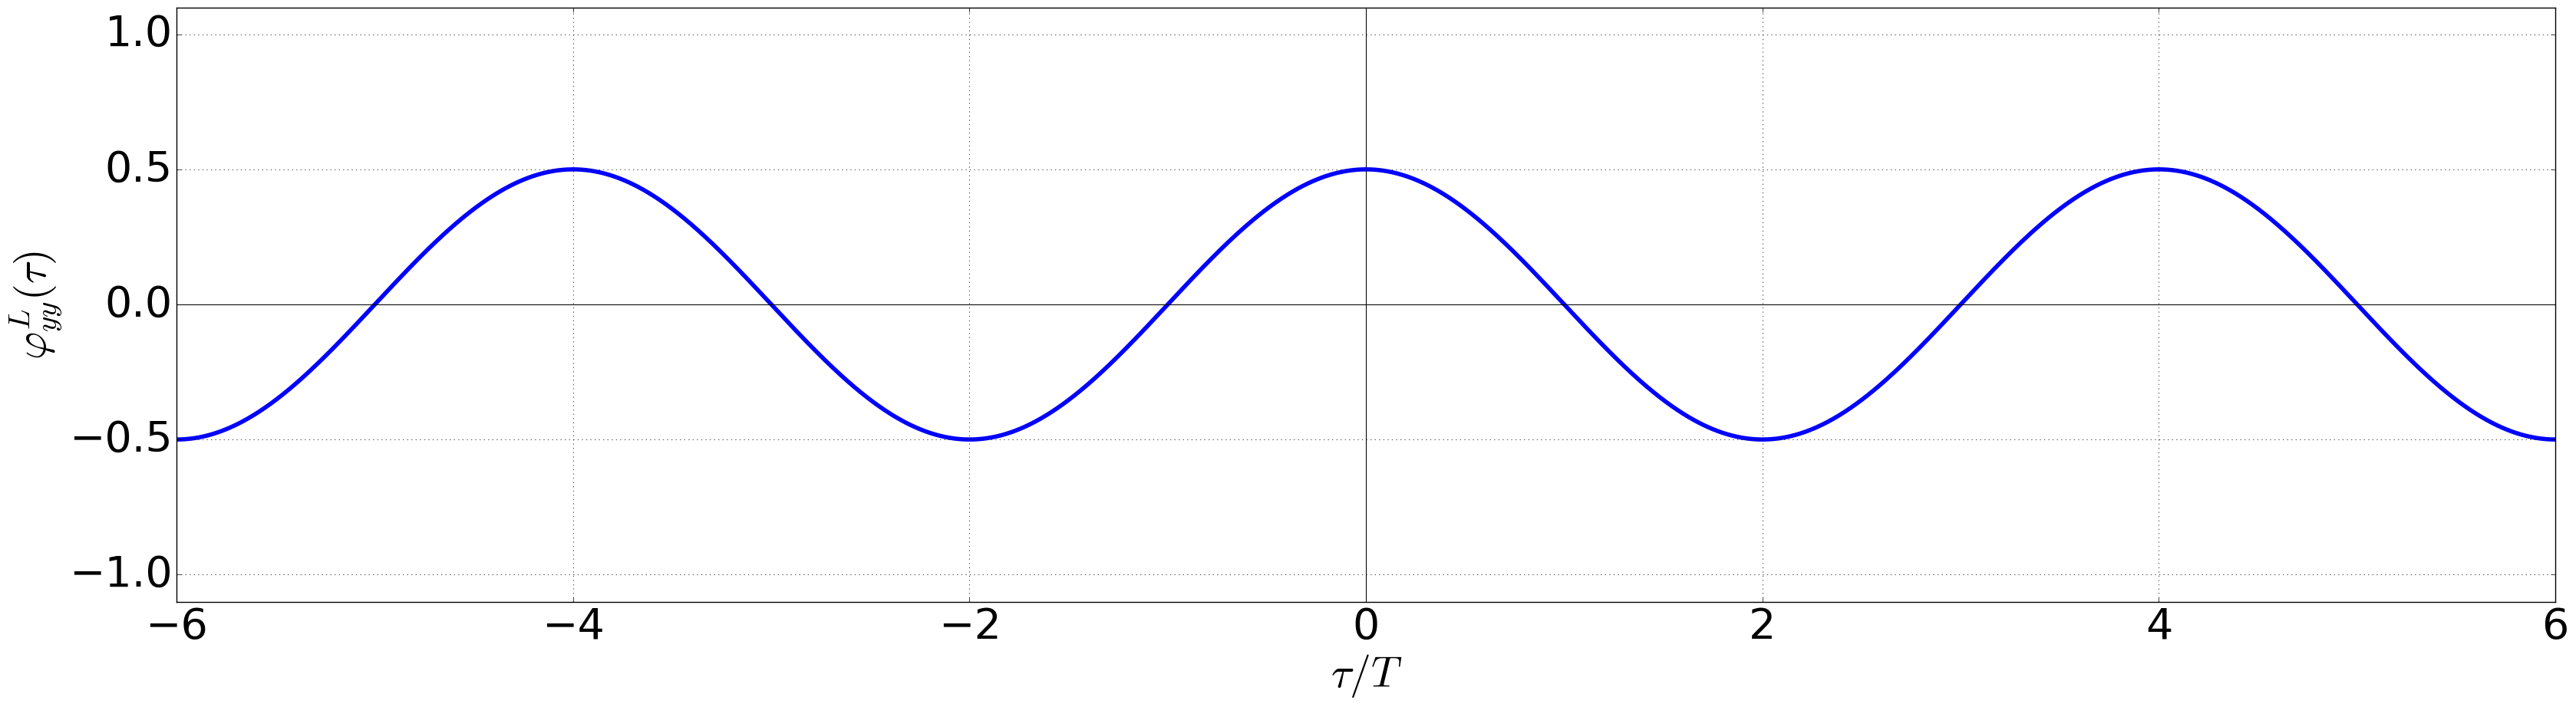

In [6]:
phi_yy = 1/2*np.cos(omega_0*tau)

plt.axvline(linewidth=0.75, color='k')
plt.plot(t/T, phi_yy, 'b-', lw=4);
plt.axhline(linewidth=0.75, color='k')
plt.xlabel(r'$\tau/T$')
plt.ylabel(r'$\varphi_{yy}^L(\tau)$')
plt.xlim((-6, 6))
plt.ylim((-1.1, 1.1))
plt.grid(True);

Das Leistungsdichtespektrum kann **nicht** durch das Betragsquadrat der Fouriertransformierten des Signals gewonnen werden, weil diese Diracimpulse enthält.
Stattdessen muss das Wiener-Khinchine-Theorem ausgenutzt, also die AKF transformiert werden:

\begin{align}
    \Phi^\text{L}_{yy}(j\omega) =  \mathcal{F} \left\{ \varphi^\text{L}_{yy}(\tau) \right\} = \frac{\pi}{2} \left( \delta (\omega - \omega_0) + \delta (\omega + \omega_0) \right)
\end{align}  

Das Signal enthält also nur Leistungsanteile bei den Frequenzen $\omega_0$ und $-\omega_0$. Durch das Leistungsdichtespektrum können auch ohne Kenntnis der eigentlichen Fouriertransformierten des Signals Aussagen über die spektralen Eigenschaften getroffen werden, sofern die AKF bekannt ist.

#### Graph des Leistungsdichtespektrums $\Phi_{yy}^L(j\omega)$:

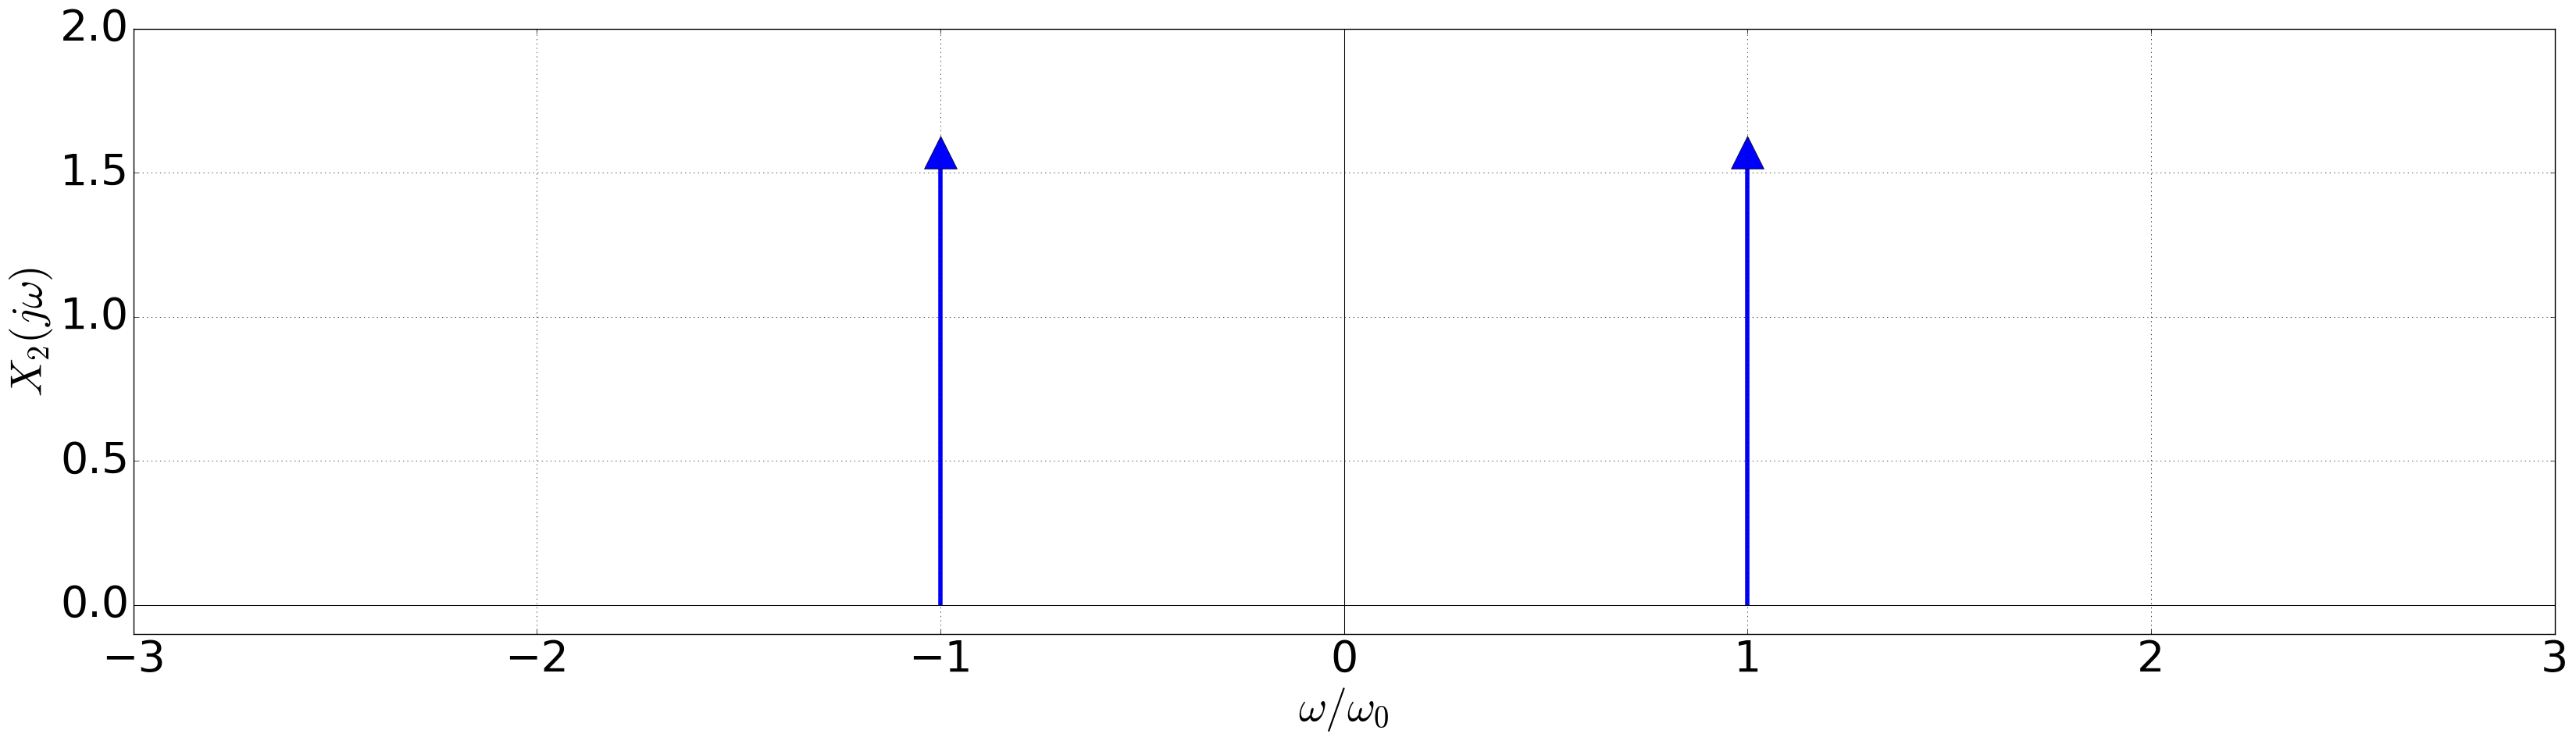

In [7]:
plt.axvline(lw=0.75, c='k')
plt.plot([-1, 1], [pi/2, pi/2], 'b^', ms=30)
plt.vlines([-1, 1], 0, [pi/2, pi/2], 'b', lw=4)
plt.axhline(lw=0.75, c='k')
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$X_2(j\omega)$')
plt.xlim((-3, 3))
plt.ylim((-0.1, 2))
plt.grid(True)

Die Leistung kann durch den Wert der AKF an der Stelle Null bestimmt werden:  

\begin{align}
    P_y = \frac{1}{T} \int_{- T/2}^{+ T/2} \left|y(t)\right|^2 \mathrm{d}t = \varphi^\text{L}_{yy}(0) = \frac{1}{2}
\end{align}

Auch dieses Ergebnis ist sinnvoll, wenn diese Leistungsdefinition mit der des Effektivwertes aus der Theorie der Wechselstromrechnung verglichen wird:

\begin{align}
    Y_\text{eff} = \sqrt{ \frac{1}{T} \int_{- T/2}^{+ T/2} \left|y(t)\right|^2 \mathrm{d}t } = \sqrt{P_y}
\end{align}

Festzuhalten ist: **Die Leistung eines Leistungssignals ist das Quadrat seines Effektivwertes.**

Alternativ kann auch über alle Frequenzen integriert werden:

\begin{align}
    P_y = \varphi^\text{L}_{yy}(0) &= \left. \frac{1}{2 \pi} \int_{-\infty}^{\infty} \Phi^\text{L}_{yy}(j\omega)\mathrm{e}^{j \omega \tau} \mathrm{d}\omega\right|_{\tau=0} = \frac{1}{2 \pi} \int_{-\infty}^{\infty} \Phi^\text{L}_{yy}(j\omega) \mathrm{d}\omega \\
    &= \frac{1}{2 \pi} \int_{-\infty}^{\infty} \frac{\pi}{2} \left( \delta (\omega - \omega_0) + \delta (\omega + \omega_0) \right) \mathrm{d}\omega = \frac{1}{4} + \frac{1}{4} =  \frac{1}{2}
\end{align}

Daher stammt auch der Name **Leistungs**dichtespektrum: Es wird damit beschreiben, wie sich die Leistung auf die einzelnen Frequenzen aufteilt.

## Zusatz: AKF und Leistungsdichtespektrum eines beliebigen periodischen Signals

Die Darstellung oben kann einfach auf beliebige periodische Signale erweitert werden. Dazu wird zunächst folgendes Integral bestimmt, welches das Skalarprodukt zwischen zwei Exponentialschwingungen für Vielfache der Grundfrequenz darstellt:

\begin{align}
    \frac{1}{T}\int_{- T/2}^{+ T/2} \mathrm{e}^{-jk\omega_0t} \mathrm{e}^{jm\omega_0t}\mathrm{d}t 
    = \frac{1}{T}\int_{- T/2}^{+ T/2} \cos((m-k)\omega_0t) + j \sin((m-k)\omega_0t) \mathrm{d}t = \gamma(m-k)
\end{align}

Das Ergebnis ist also nur dann ungleich Null, wenn die Frequenzen gleich sind, weil sonst periodische Funktionen über ganze Vielfache der Periodendauer integriert werden. Wenn das Verhältnis der Frequenzen also rational ist, sind die Schwingungen deshalb orthogonale Signale.

Ein beliebiges periodisches Signal $x(t) = x(t+T)$ mit Periodendauer $T = \frac{2 \pi}{\omega_0}$ kann über eine Fourierreihe dargestellt werden:

\begin{align}
    x(t) = \sum_{n=-\infty}^{\infty} X_n \mathrm{e}^{jn\omega_0t}
\end{align}

Die AKF ergibt sich dann zu

\begin{align}
    \varphi^\text{L}_{xx}(\tau) &= \frac{1}{T}\int_{- T/2}^{+ T/2} x^{\ast}(t) x(t+\tau) \mathrm{d}t
    = \frac{1}{T}\int_{- T/2}^{+ T/2} \left( \sum_{m=-\infty}^{\infty} X_m \mathrm{e}^{jm\omega_0t} \right)^{\ast} \cdot \left( \sum_{k=-\infty}^{\infty} X_k \mathrm{e}^{jk\omega_0(t+\tau)} \right) \mathrm{d}t \\
    &= \frac{1}{T}\int_{- T/2}^{+ T/2} \left( \sum_{m=-\infty}^{\infty} X^{\ast}_m \mathrm{e}^{-jm\omega_0t} \right) \cdot \left( \sum_{k=-\infty}^{\infty} X_k \mathrm{e}^{jk\omega_0(t+\tau)} \right) \mathrm{d}t
    = \sum_{m=-\infty}^{\infty} \sum_{k=-\infty}^{\infty} X^{\ast}_m X_k \mathrm{e}^{jk\omega_0\tau} \frac{1}{T}\int_{- T/2}^{+ T/2} \mathrm{e}^{j(k-m)\omega_0t} \mathrm{d}t \\
    &= \sum_{m=-\infty}^{\infty} \sum_{k=-\infty}^{\infty} X^{\ast}_m X_k \mathrm{e}^{jk\omega_0\tau} \gamma(k-m)
    = \sum_{k=-\infty}^{\infty} |X_k|^2 \mathrm{e}^{jk\omega_0\tau}
\end{align}  

Weil $\gamma(k-m)$ nur für $m = k$ ungleich Null ist, gibt es deshalb für jeden Term der äußeren Summe nur den einen Summanden der inneren Summe, der übrig bleibt und eine der Summen kann weggelassen werden.


Da durch die Symmetrieanforderungen reeller Zeitsignale $X_{-k} = X^{\ast}_k$ und damit auch  $|X_k|^2 = |X_{-k}|^2 $ gelten muss, enthält in diesem Fall die AKF nur Kosinusterme (und den Gleichanteil) und ist deshalb wie erwartet **immer** eine gerade Funktion:

\begin{align}
   \varphi^\text{L}_{xx}(\tau) &= |X_0|^2 + \sum_{k=-\infty}^{-1} |X_k|^2 \mathrm{e}^{jk\omega_0\tau} + \sum_{k=1}^{\infty} |X_k|^2 \mathrm{e}^{jk\omega_0\tau} \\
    &= |X_0|^2  + \sum_{k=1}^{\infty} |X_k|^2 \mathrm{e}^{jk\omega_0\tau} + |X_{-k}|^2 \mathrm{e}^{-jk\omega_0\tau} \\
    &= |X_0|^2  + \sum_{k=1}^{\infty} |X_k|^2 2 \cos\left(k\omega_0\tau\right)
\end{align}

Durch Fouriertransformation lässt sich dann das Leistungsdichtespektrum gewinnen:

\begin{align}
    \Phi^\text{L}_{xx}(j\omega) &=  \mathcal{F} \left\{ \varphi^\text{L}_{xx}(\tau) \right\} = \sum_{k=-\infty}^{\infty} |X_k|^2 \mathcal{F} \left\{ \mathrm{e}^{jk\omega_0\tau} \right\} = \sum_{k=-\infty}^{\infty} |X_k|^2 2\pi \delta (\omega - k\omega_0)\\
    &= \sum_{k=-\infty}^{\infty} |X_k|^2 2\pi \delta (\omega - k\omega_0) = |X_0|^2 2 \pi \delta (\omega)  + \sum_{k=1}^{\infty} |X_k|^2 2 \pi \left( \delta (\omega - k\omega_0) + \delta (\omega + k\omega_0) \right)
\end{align}

Das Leistungsdichtespektrum ist für relle periodische Signale also **immer** rein reell.